In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import string

from collections import defaultdict

from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import pickle as pkl

from helper_code import *

In [2]:
model = joblib.load('Data/Model/final_model.joblib')
vectorizer = joblib.load('Data/Vectorizer/final_model.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Data Exploration and Analysis

In [3]:
def open_file(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

In [4]:
data_raw = dict()
data_raw['sk'] = open_file('Data/Sentences/train_sentences.sk')
data_raw['cs'] = open_file('Data/Sentences/train_sentences.cs')
data_raw['en'] = open_file('Data/Sentences/train_sentences.en')

In [5]:
def show_statistics(data):
    for language, sentences in data.items():
        
        number_of_sentences = 0
        number_of_words = 0
        number_of_unique_words = 0
        sample_extract = ''
        
        # take a few minutes to try populate these variables
        
        # here is a hint -- word_list breaks the collections of sentences into a list of words
        word_list = ' '.join(sentences).split()
        
        number_of_sentences = len(sentences)
        number_of_words = len(word_list)
        number_of_unique_words = len(set(word_list))
        sample_extract = ' '.join(sentences[0].split()[0:7])
        
        print(f'Language: {language}')
        print('-----------------------')
        print(f'Number of sentences\t:\t {number_of_sentences}')
        print(f'Number of words\t\t:\t {number_of_words}')
        print(f'Number of unique words\t:\t {number_of_unique_words}')
        print(f'Sample extract\t\t:\t {sample_extract}...\n')

In [6]:
show_statistics(data_raw)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...



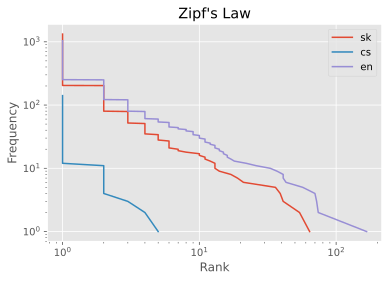

In [7]:
do_law_of_zipf(data_raw)

In [8]:
def preprocess(text):
    '''
    Removes punctuation and digits from a string, and converts all characters to lowercase. 
    Also clears all \n and hyphens (splits hyphenated words into two words).
    
    '''
        
    preprocessed_text = text
    
    preprocessed_text = text.lower().replace('-',' ')
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    preprocessed_text = preprocessed_text.translate(translation_table)
    return preprocessed_text

In [9]:
data_preprocessed = {k: [preprocess(sentence) for sentence in v]for k, v in data_raw.items()}

In [10]:
print('raw')
show_statistics(data_raw)
print('\nPreProcessed')
show_statistics(data_preprocessed)

raw
Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 2016
Number of unique words	:	 1322
Sample extract		:	 Pán de Grandes Pascual jasne vysvetlil, aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 158
Number of unique words	:	 141
Sample extract		:	 Upozorňujeme, že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 2381
Number of unique words	:	 1037
Sample extract		:	 I can understand your approach a little...


PreProcessed
Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 1996
Number of unique words	:	 1207
Sample extract		:	 pán de grandes pascual jasne vysvetlil aká...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 155
Number of unique words	:	 133
Sample extract		:	 upozorňujeme že jejím cílem je šetřit penězi...

Language: en
-----------------------
Number of sentence

### Naive Bayes Model

In [11]:
sentences_train, y_train = [], []
for k, v in data_preprocessed.items():
    for sentence in v:
        sentences_train.append(sentence)
        y_train.append(k)

In [12]:
vectorizer = CountVectorizer()

In [13]:
x_train = vectorizer.fit_transform(sentences_train)

In [14]:
x_train

<210x2208 sparse matrix of type '<class 'numpy.int64'>'
	with 3867 stored elements in Compressed Sparse Row format>

In [15]:
#initialize model
naive_classifier = MultinomialNB()
naive_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Vectorizing validation Data and Evaluating Model

In [16]:
data_val = dict()
data_val['sk'] = open_file('Data/Sentence/val_sentences.sk')
data_val['cs'] = open_file('Data/Sentence/val_sentences.cs')
data_val['en']= open_file('Data/Sentence/val_sentences.en')

data_val_preprocessed = {k: [preprocess(sentence) for sentence in v] for k, v in data_val.items()}

In [17]:
sentences_val , y_val = [], []
for k, v in data_val_preprocessed.items():
    for sentence in v:
        sentences_val.append(sentence)
        y_val.append(k)

In [18]:
x_val = vectorizer.transform(sentences_val)

In [19]:
predictions = naive_classifier.predict(x_val)

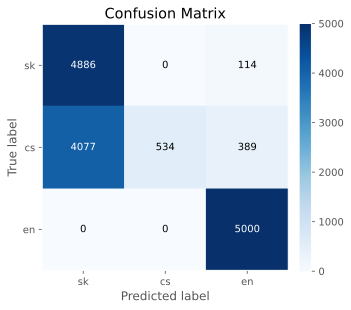

In [20]:
plot_confusion_matrix(y_val, predictions, ['sk','cs','en'])

In [21]:
f1_score(y_val, predictions, average='weighted')

0.6149824401040264

### Model Improvisation

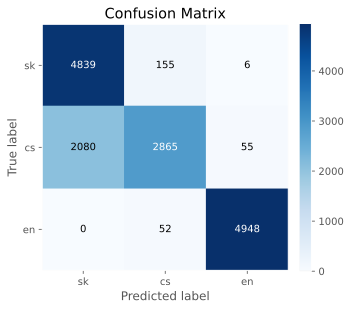

In [22]:
naive_classifier = MultinomialNB(alpha=0.0001, fit_prior = False)
naive_classifier.fit(x_train, y_train)

predictions = naive_classifier.predict(x_val)
plot_confusion_matrix(y_val, predictions, ['sk','cs','en'])

In [23]:
f1_score(y_val, predictions, average='weighted')

0.8368507601649364

In [24]:
# taken from https://arxiv.org/abs/1508.07909

import re, collections
def get_stats(vocab):
    pairs = collections.defaultdict(int) 
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word] 
    return v_out

In [25]:
def get_vocab(data):

    words = []
    for sentence in data:
        words.extend(sentence.split())
        
    vocab = defaultdict(int)
    for word in words:
        vocab[' '.join(word)] += 1
        
    return vocab

In [26]:
vocab = get_vocab(sentences_train)

In [27]:
# also taken from original paper
for i in range(100):
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab(best, vocab)

In [28]:
merges = defaultdict(int)
for k, v in vocab.items():
    for subword in k.split():
        if len(subword) >= 2:
            merges[subword] += v

In [29]:
merge_ordered = sorted(merges, key=merges.get, reverse=True)

In [30]:
pkl.dump(merge_ordered, open('merge_ordered.pkl', 'wb'))

In [31]:
def split_into_subwords(text):
    merges = pkl.load(open('merge_ordered.pkl', 'rb'))
    subwords = []
    for word in text.split():
        for subword in merges:
            subword_count = word.count(subword)
            if subword_count > 0:
                word = word.replace(subword, ' ')
                subwords.extend([subword]*subword_count)
    return ' '.join(subwords)

In [32]:
split_into_subwords('hello my name is vinay')

'lo na me is in'

In [33]:
data_processed_subwords = {k:[split_into_subwords(sentence) for sentence in v] for k, v in data_preprocessed.items()}

In [34]:
show_statistics(data_processed_subwords)

Language: sk
-----------------------
Number of sentences	:	 100
Number of words		:	 3431
Number of unique words	:	 75
Sample extract		:	 de an de al as ne as...

Language: cs
-----------------------
Number of sentences	:	 10
Number of words		:	 239
Number of unique words	:	 59
Sample extract		:	 po je me or že je le...

Language: en
-----------------------
Number of sentences	:	 100
Number of words		:	 3863
Number of unique words	:	 75
Sample extract		:	 an st an er ou ro ch...



In [35]:
data_train_subwords = []
for sentence in sentences_train:
    data_train_subwords.append(split_into_subwords(sentence))

In [36]:
data_val_subwords = []
for sentence in sentences_val:
    data_val_subwords.append(split_into_subwords(sentence))

In [37]:
vectorizer = CountVectorizer()

In [38]:
X_train = vectorizer.fit_transform(data_train_subwords)
X_val = vectorizer.transform(data_val_subwords)

In [39]:
naive_classifier = MultinomialNB(fit_prior=False)
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [40]:
predictions = naive_classifier.predict(X_val)

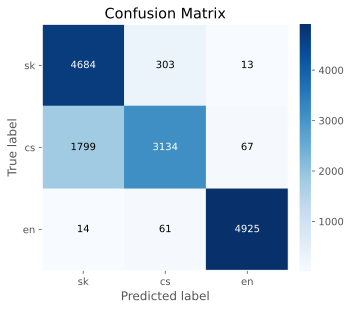

In [41]:
plot_confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])

In [42]:
f1_score(y_val, predictions, average='weighted')

0.8456381060126386